In [183]:
import pandas as pd
import numpy as np
import random
import pprint
import math
import matplotlib.pyplot as plt
import itertools
from scipy import optimize, exp

In [147]:
df = pd.read_table('../../../src/0522gibbs/data/PT_BD_50_50_1_50.csv', header=None)
df.shape #(50, 50)
#q=50, d=50
#df.sum( axis = 1)　#すべての行0が25個、1が25個

(50, 50)

In [148]:
#変数
m = 3
d = 50
q = 50
b_list = [1, 7.6, 13.7, 20.0] #4つ
MCMC_step = 10000

In [149]:
df_list = []
for qq in range(q): #行
    qq_list = []
    for dd in range(d): #列
        if df.iloc[qq, dd] == 1:
            qq_list.append(dd)
    df_list.append(qq_list) 
#pprint.pprint(df_list)  

In [150]:
df_df = pd.DataFrame(df_list)
df_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,5,6,9,14,15,18,19,21,23,...,34,35,36,37,42,44,46,47,48,49
1,1,3,4,6,10,15,16,18,22,25,...,33,34,35,37,38,40,42,43,46,49
2,1,2,3,5,6,7,11,12,16,17,...,29,31,32,33,35,37,38,39,43,49
3,0,2,4,11,12,13,14,15,19,20,...,36,37,38,39,40,41,42,44,46,48
4,0,1,4,5,6,7,8,11,12,13,...,23,26,28,30,39,41,42,43,45,47


In [151]:
def E(s):
    return -s/q

In [152]:
def Bol(x, b):
    return np.exp(-b*E())

In [153]:
dis_s_dic_list = []

for b in b_list:
    x_list = []
    E_list = []
    
    while len(x_list) < MCMC_step:
        x = [random.randrange(d) for _ in range(m)]
        if len(set(x)) != len(x):
            continue            
        if x in x_list:
            continue
            
        x_list.append(x)

        sx = 0
        for j in range(q):
            if set(x) <=  set(df_df.iloc[j, :].values.tolist()):
                sx += 1
        E_list.append(-sx/q)

        if len(E_list) >= 2:
            r = math.exp(-E_list[-1]*b-(-E_list[-2]*b)) 
            R = np.random.uniform(0.0, 1.0)
            if R > r :
                del x_list[-1]
                del E_list[-1]
                
    #kxの個数(s(x))
    sx_set_list = [] #-sx/qがエネルギーの定義だった
    for ii in range(len(x_list)):
        sx_set_list.append(int(-E_list[ii]*q //1))
            
            
    #N(s)が知りたい
    #key->s, value->xの個数(N(s))
    sx_set_list = sorted(sx_set_list)    
    s_x_dic = {}
    for ss in sx_set_list:
        if not ss in s_x_dic:
            s_x_dic[ss] = 1
        else:
            s_x_dic[ss] += 1

            
    #distribution of support
    Zb = sum([s_x_dic[jj]*math.exp(-b*(-jj/q)) for jj in s_x_dic])

    dis_s_dic = {}
    for jj in s_x_dic:
        dis_s_dic[jj] = s_x_dic[jj]*math.exp(-b*(-jj/q))/Zb
    dis_s_dic_list.append(dis_s_dic)

In [154]:
dis_s_dic_list[0]

{0: 0.0006212728354320681,
 1: 0.008058611535924515,
 2: 0.02715835335489154,
 3: 0.07595861469176149,
 4: 0.13383420353498093,
 5: 0.17989251951639892,
 6: 0.1856280389691838,
 7: 0.1594654423443289,
 8: 0.10717335265602138,
 9: 0.06354165403392631,
 10: 0.032521043775716456,
 11: 0.016810192969121052,
 12: 0.0058670304766229855,
 13: 0.0029927761771142924,
 14: 0.00023486417433016558,
 15: 0.00011980437268795627,
 16: 0.00012222458155731786}

In [155]:
dis_s_dic_list[1]

{0: 0.00014883963426369522,
 1: 0.0019493233179175415,
 2: 0.010640611346117058,
 3: 0.038394996728874475,
 4: 0.08379152951658737,
 5: 0.13820451382891366,
 6: 0.18228891687177023,
 7: 0.18482416345496483,
 8: 0.13997019261149396,
 9: 0.10449114686519483,
 10: 0.06448005887108604,
 11: 0.0263421135546416,
 12: 0.014987358453782348,
 13: 0.007247500654589202,
 14: 0.0018749449056863234,
 15: 0.00036378938411682905}

In [156]:
dis_s_dic_list[2]

{0: 1.4771299368431013e-05,
 1: 0.0005051132210191597,
 2: 0.0036282768724194177,
 3: 0.017575611858770632,
 4: 0.04662919434643549,
 5: 0.0977750691339818,
 6: 0.15390141157351303,
 7: 0.1851182793117323,
 8: 0.16623691933867535,
 9: 0.13549596117532534,
 10: 0.09242020884167651,
 11: 0.05265266007809221,
 12: 0.02532555260779916,
 13: 0.01249070312424487,
 14: 0.007529480584714157,
 15: 0.00270078663223231}

In [157]:
dis_s_dic_list[3]

{0: 9.411449796856211e-06,
 1: 9.126151610914658e-05,
 2: 0.0008901865855726138,
 3: 0.005218267994250634,
 4: 0.019601698329848365,
 5: 0.05319942384874861,
 6: 0.10006115658395494,
 7: 0.1474164890563359,
 8: 0.1679700570373163,
 9: 0.1741156565137859,
 10: 0.13103117574973086,
 11: 0.0923717767427565,
 12: 0.050317924547994865,
 13: 0.0358267266834028,
 14: 0.011452970507559392,
 15: 0.007593699673126297,
 16: 0.0028321171797100636}

In [158]:
#様子を見ながら削除
del dis_s_dic_list[0][16]
del dis_s_dic_list[3][16]

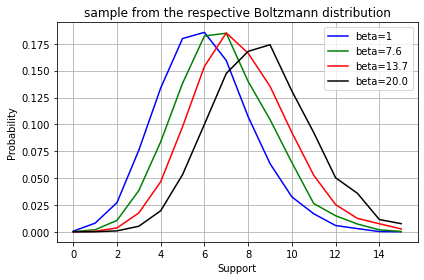

In [159]:
"""複数のグラフを重ねて描画"""
fig, ax = plt.subplots()

#s = np.arange(0, 20+1)
s = np.linspace(0, 15, 15+1)

y = [list(dis_s_dic_list[ii].values()) for ii in range(len(b_list))]

c1,c2,c3,c4 = "blue","green","red","black"      # 各プロットの色

ll_list = ['beta='+ str(ll) for ll in b_list]

ax.set_xlabel('Support')  # x軸ラベル
ax.set_ylabel('Probability')  # y軸ラベル
ax.set_title('sample from the respective Boltzmann distribution') # グラフタイトル

ax.grid()  # 罫線

ax.plot(s, y[0], color=c1, label=ll_list[0])
ax.plot(s, y[1], color=c2, label=ll_list[1])
ax.plot(s, y[2], color=c3, label=ll_list[2])
ax.plot(s, y[3], color=c4, label=ll_list[3])

ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定

plt.savefig('sample_Boltzdis.png') # 画像の保存
plt.show()

In [194]:
#makeing s_df
sample_df_each = [pd.Series(dis_s_dic_list[ii]) for ii in range(len(b_list))]
sample_df_concat = pd.concat(sample_df_each, axis=1)
sample_df_concat.columns = b_list
sample_df_concat

s_range = 15
sample_df_concat.head()

,1.0,7.6,13.7,20.0
0,0.000621,0.000149,0.000015,0.000009
1,0.008059,0.001949,0.000505,0.000091
2,0.027158,0.010641,0.003628,0.000890
3,0.075959,0.038395,0.017576,0.005218
4,0.133834,0.083792,0.046629,0.019602


In [189]:
sum(sample_df_concat.iloc[1, :])

0.010604309590970362

In [195]:
sum(sample_df_concat.iloc[:, 1])

0.9999999999999999

In [197]:
#j = 1,..., k

def H(s, j):
    return sample_df_concat.iloc[s, j]

def h(j):
    return sum(sample_df_concat.iloc[:, j])

def N(s):
    chil = sum(sample_df_concat.iloc[s, :])
    moth = sum([h(j)*math.exp(b[j]*s/q + f(j)) for j in range(b_list)])
    return chil/moth

def sigma(s):
        return N(s)*math.exp(b[j]*s/q)
    
def f(j):
    return math.log(sum([sigma(i) for i in range(s_range)]))

def f_prime(j):
    return -1/sum([sigma(i) for i in range(s_range)])

def Newton(ini_num, err):
    x_n = b_list[ini_num]
    x_n_scc=0
    count=0
    while True:
        count=count+1
        x_n_scc=x_n-f(x_n)/f_prime(x_n)
        if h(x_n_scc)<err:
            break
        x_n=x_n_scc
    print(\
        "数値解は",x_n_scc,\
        "\nその時の関数の値は",h(x_n_scc),\
        "\n計算回数は",count,"です")

In [199]:
#Newton(0,1/100000)    

In [160]:
x_comb_list = list(itertools.combinations(range(50), 3))

In [161]:
#key->x, value->xの個数(s(x))
sx_dic = {}
for xx in x_comb_list:
    for qq in range(q):
        if set(list(xx)) <=  set(df_df.iloc[qq, :].tolist()):
            if not xx in sx_dic:
                sx_dic[xx] = 1
            else:
                sx_dic[xx] += 1
    if not xx in list(sx_dic.keys()):
        sx_dic[xx] = 0

In [162]:
#N(s)が知りたい
#key->s, value->xの個数(N(s))
sx_values_list = sorted(list(sx_dic.values()))    
s_ns_dic = {}
for ss in sx_values_list:
    if not ss in s_ns_dic:
        s_ns_dic[ss] = 1
    else:
        s_ns_dic[ss] += 1

In [163]:
dis_ns_dic_list = []
for b in b_list:
    #distribution of support
    Zb = sum([s_ns_dic[jj]*math.exp(-b*(-jj/q)) for jj in s_ns_dic])

    dis_s_dic = {}
    for jj in s_ns_dic:
        dis_s_dic[jj] = s_ns_dic[jj]*math.exp(-b*(-jj/q))/Zb
    dis_ns_dic_list.append(dis_s_dic)

In [164]:
dis_ns_dic_list[0]

{0: 0.0005892939526042707,
 1: 0.007584350056854819,
 2: 0.030714355020696176,
 3: 0.0807196673638065,
 4: 0.13612108951239374,
 5: 0.1787487139832466,
 6: 0.18655067909143816,
 7: 0.15559250694007884,
 8: 0.10245473442861278,
 9: 0.06490719158772729,
 10: 0.03272163600885209,
 11: 0.014912049784571984,
 12: 0.005186349945261148,
 13: 0.0023516094062236066,
 14: 0.0005997787668622117,
 15: 0.00018356853050172705,
 16: 6.242562026820145e-05}

In [165]:
dis_ns_dic_list[1]

{0: 0.00025763172052190183,
 1: 0.0037836642435946943,
 2: 0.01748487341903845,
 3: 0.05243573112803128,
 4: 0.10090211103450736,
 5: 0.15119750806793755,
 6: 0.18006338637952773,
 7: 0.17137368252868704,
 8: 0.12876989878037334,
 9: 0.09308978182147473,
 10: 0.053551430306930395,
 11: 0.0278484021702064,
 12: 0.011052273564110465,
 13: 0.005718496624669878,
 14: 0.0016643115956529804,
 15: 0.0005812576142076238,
 16: 0.00022555900052797102}

In [166]:
dis_ns_dic_list[2]

{0: 0.00011100264521789454,
 1: 0.001841749293909959,
 2: 0.009615333247679124,
 3: 0.03257715113472537,
 4: 0.07082228816052732,
 5: 0.11989422420157375,
 6: 0.1613106230551735,
 7: 0.17344652813543515,
 8: 0.14723795031917955,
 9: 0.12025173412588036,
 10: 0.07815276311361623,
 11: 0.045915304759867236,
 12: 0.02058698470550439,
 13: 0.012033914230285159,
 14: 0.003956795531135569,
 15: 0.0015612108155944593,
 16: 0.0006844425246950082}

In [167]:
dis_ns_dic_list[3]

{0: 4.2739454288910437e-05,
 1: 0.0008043540653379001,
 2: 0.004763237039437956,
 3: 0.018305098123454627,
 4: 0.04513880083245874,
 5: 0.08667611355002147,
 6: 0.1322772755455735,
 7: 0.16132771717293956,
 8: 0.15534033779869158,
 9: 0.14390534826155701,
 10: 0.10608427894784458,
 11: 0.07069444146292245,
 12: 0.03595353878193502,
 13: 0.023838389832219514,
 14: 0.008890674675926405,
 15: 0.00397899841807224,
 16: 0.0019786560373185715}

In [168]:
#様子を見ながら削除
del dis_ns_dic_list[0][16]
del dis_ns_dic_list[1][16]
del dis_ns_dic_list[2][16]
del dis_ns_dic_list[3][16]

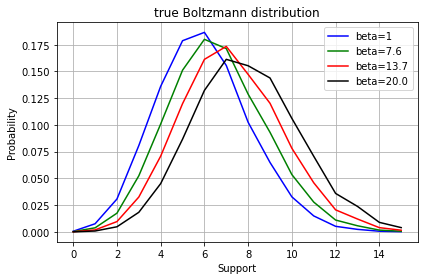

In [169]:
"""複数のグラフを重ねて描画"""
fig, ax = plt.subplots()

s = np.linspace(0, 15, 15+1)

y_ = [list(dis_ns_dic_list[ii].values()) for ii in range(len(b_list))]

c1,c2,c3,c4 = "blue","green","red","black"      # 各プロットの色

ll_list = ['beta='+ str(ll) for ll in b_list]

ax.set_xlabel('Support')  # x軸ラベル
ax.set_ylabel('Probability')  # y軸ラベル
ax.set_title('true Boltzmann distribution') # グラフタイトル

ax.grid()  # 罫線

ax.plot(s, y_[0], color=c1, label=ll_list[0])
ax.plot(s, y_[1], color=c2, label=ll_list[1])
ax.plot(s, y_[2], color=c3, label=ll_list[2])
ax.plot(s, y_[3], color=c4, label=ll_list[3])

ax.legend(loc=0)    # 凡例
fig.tight_layout()  # レイアウトの設定

plt.savefig('true_Boltzdis.png') # 画像の保存
plt.show()